In [ ]:
"""
Roteiro de Análise Exploratória de Dados (EDA) para o Desafio Lighthouse.

Este script realiza uma análise exploratória completa do conjunto de dados de filmes,
com o objetivo de extrair insights para a PProductions.
"""

In [1]:
#Preparar as bibliotecas que serão usadas na analise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos 
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# 2. Carregamento e Inspeção Inicial dos Dados
# Lembre-se de fornecer o nome correto do arquivo csv.
# Se o arquivo não estiver na mesma pasta do seu script, forneça o caminho completo.
try:
    df = pd.read_csv('desafio_indicium_imdb.csv')
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o nome e o caminho do arquivo.")
    # Encerre o script ou lide com o erro como preferir
    exit()

#visão inicial dos dados
print(df.head())
print("\n" + "="*50 + "\n")

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  W

In [3]:
# --- LIMPEZA E PREPARAÇÃO DOS DADOS ---
print("Realizando a limpeza e preparação dos dados...")

# Remove a coluna 'Unnamed: 0', que é apenas um índice duplicado
df.drop('Unnamed: 0', axis=1, inplace=True)

# Limpa a coluna 'Runtime' removendo o sufixo " min" e convertendo para inteiro
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# Limpa a coluna 'Gross' removendo vírgulas e convertendo para float
# 'errors=coerce' transforma valores inválidos em NaN (Not a Number)
df['Gross'] = df['Gross'].str.replace(',', '', regex=False).astype(float)

# Converte a coluna 'Released_Year' para um tipo numérico
# 'errors=coerce' lida com possíveis valores não numéricos que possam existir
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

mapeamento_colunas = {
    'Series_Title': 'Titulo',
    'Released_Year': 'Ano_Lancamento',
    'Certificate': 'Certificado',
    'Runtime': 'Duracao_Min',
    'Genre': 'Genero',
    'IMDB_Rating': 'Nota_IMDB',
    'Overview': 'Resumo',
    'Meta_score': 'Nota_Metascore',
    'Director': 'Diretor',
    'Star1': 'Estrela1',
    'Star2': 'Estrela2',
    'Star3': 'Estrela3',
    'Star4': 'Estrela4',
    'No_of_Votes': 'Num_Votos',
    'Gross': 'Faturamento'
}

# 4. Renomear as colunas usando o método .rename()
df.rename(columns=mapeamento_colunas, inplace=True)

print("Limpeza de dados concluída.")
print("\n" + "="*50 + "\n")

Realizando a limpeza e preparação dos dados...
Limpeza de dados concluída.




In [4]:
# --- ANÁLISE DESCRITIVA ---

# Exibe informações gerais sobre o DataFrame após a limpeza
print("Informações do DataFrame após a limpeza:")
df.info()
print("\n" + "="*50 + "\n")

# Exibe estatísticas descritivas para as colunas numéricas
print("Estatísticas Descritivas (colunas numéricas):")
print(df.describe())
print("\n" + "="*50 + "\n")

# Exibe a contagem de valores ausentes por coluna
print("Contagem de valores ausentes por coluna:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

Informações do DataFrame após a limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Titulo          999 non-null    object 
 1   Ano_Lancamento  998 non-null    float64
 2   Certificado     898 non-null    object 
 3   Duracao_Min     999 non-null    int64  
 4   Genero          999 non-null    object 
 5   Nota_IMDB       999 non-null    float64
 6   Resumo          999 non-null    object 
 7   Nota_Metascore  842 non-null    float64
 8   Diretor         999 non-null    object 
 9   Estrela1        999 non-null    object 
 10  Estrela2        999 non-null    object 
 11  Estrela3        999 non-null    object 
 12  Estrela4        999 non-null    object 
 13  Num_Votos       999 non-null    int64  
 14  Faturamento     830 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 117.2+ KB


Estatísticas Descritiva

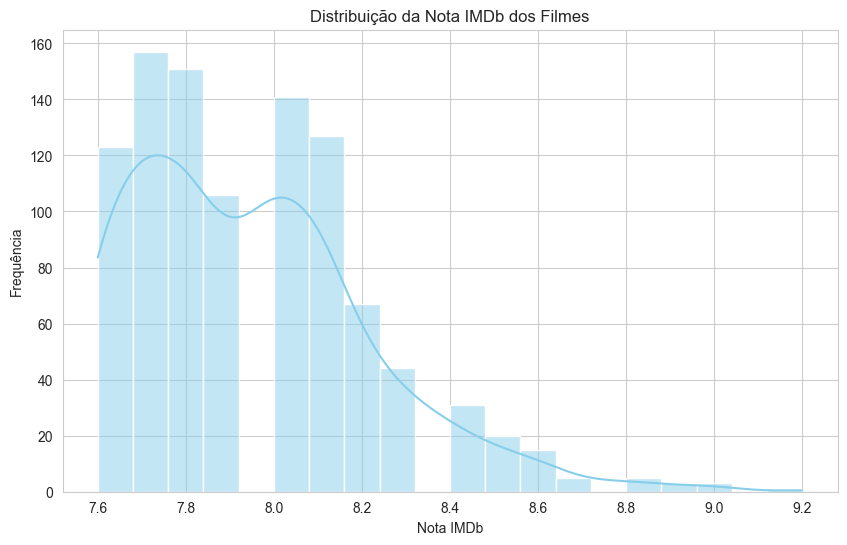

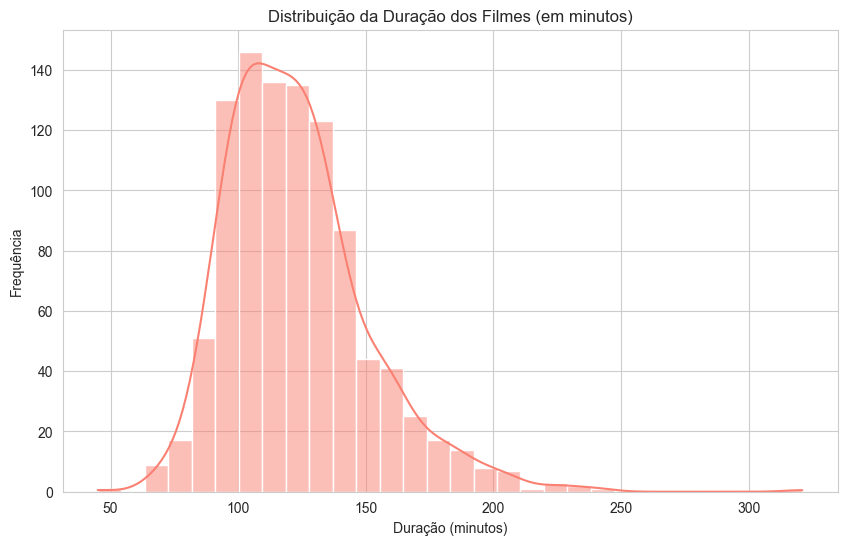

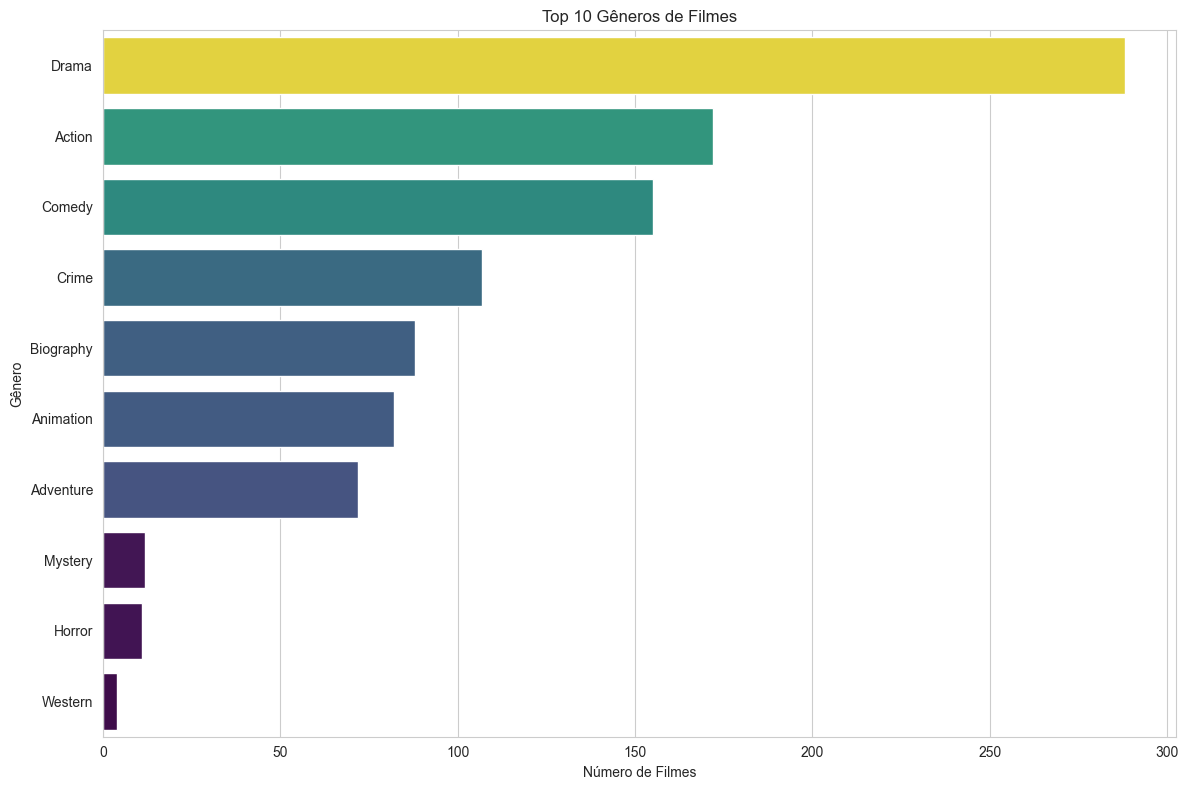

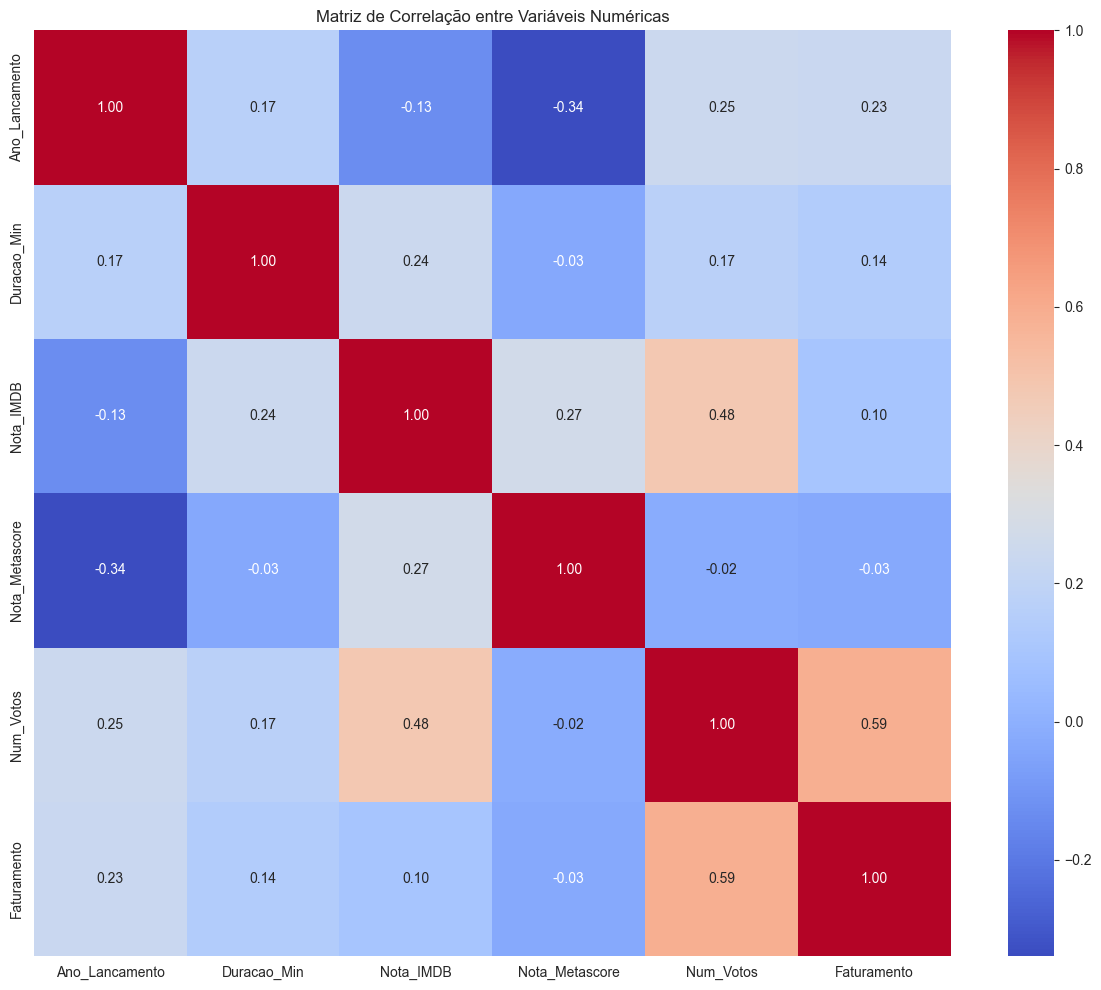

In [5]:
# --- VISUALIZAÇÕES GERAIS ---

# 1. Distribuição da Nota IMDb
plt.figure(figsize=(10, 6))
sns.histplot(df['Nota_IMDB'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição da Nota IMDb dos Filmes')
plt.xlabel('Nota IMDb')
plt.ylabel('Frequência')
plt.show() 


# 2. Distribuição da Duração dos Filmes
plt.figure(figsize=(10, 6))
sns.histplot(df['Duracao_Min'], bins=30, kde=True, color='salmon')
plt.title('Distribuição da Duração dos Filmes (em minutos)')
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.show() 


# 3. Top 10 Gêneros 
plt.figure(figsize=(12, 8))
top_genres = df['Genero'].apply(lambda x: x.split(',')[0]).value_counts().nlargest(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis', hue=top_genres.values, legend=False)
plt.title('Top 10 Gêneros de Filmes')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.tight_layout() 
plt.show() 

# 4. Matriz de Correlação entre Variáveis Numéricas
plt.figure(figsize=(12, 10))
numerical_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout() 
plt.show() 



In [ ]:
"""
A partir da analise inicial, notamos que o dataset contem apenas filmes bem avaliados, com concentração de notas entre 7.7 e 8.5.Porem, o graico de 
Distribuição da Nota IMDb tambem mostra que alguns filmes são considerados exxpecionais, com notas bem acima da media

Também é perceptivel que a maioria dos títulos se aglomera na faixa de 100 a 150 minutos (entre 1h 40min e 2h 30min). Esta parece ser a duração que 
o público considera ideal para desenvolver uma boa narrativa.
Filmes com menos de 90 minutos são raros neste dataset, sugerindo que narrativas mais curtas podem ter dificuldade em alcançar a profundidade
necessária para obter uma aclamação universal. Da mesma forma, filmes com mais de 3 horas são exceções, indicando que durações muito longas são um 
risco e só funcionam para histórias muito específicas.

Outro insight fundamental é a dominância absoluta do gênero Drama.
Embora gêneros como Ação, Comédia e Aventura também apareçam, sua frequência é consideravelmente menor. Para a PProductions, isso sugere que, embora 
blockbusters de ação possam gerar mais receita, a aposta mais segura para criar um filme que seja lembrado por sua alta qualidade e prestígio
recai sobre o gênero Drama ou sobre filmes que contenham fortes elementos dramáticos em sua composição.

Pela matriz de correlação sabemos que há forte correlação positiva entre Num_Votos e Faturamento. Isso confirma que a popularidade de um filme 
(quantas pessoas votam nele) está diretamente ligada ao seu sucesso de bilheteria, o que é uma validação crucial para estratégias de marketing focadas 
em engajamento.
utro insight relevante é a correlação positiva, porém mais moderada, entre Nota_IMDB e Num_Votos. Isso mostra que filmes mais bem avaliados tendem a
ser mais populares. No entanto, a correlação relativamente fraca entre Nota_IMDB e Faturamento indica que a qualidade percebida sozinha não garante 
sucesso comercial; a popularidade e o buzz em torno de um filme são fatores mais determinantes para a receita.
"""

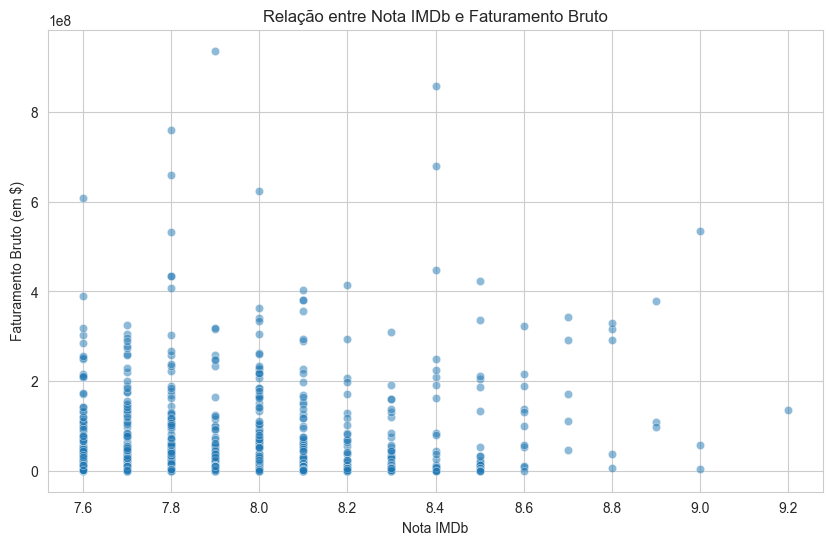

In [6]:
# Relação entre Nota IMDb e Faturamento Bruto
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nota_IMDB', y='Faturamento', data=df, alpha=0.5)
plt.title('Relação entre Nota IMDb e Faturamento Bruto')
plt.xlabel('Nota IMDb')
plt.ylabel('Faturamento Bruto (em $)')
plt.show() 


In [ ]:
"""
Este gráfico de dispersão investiga se uma avaliação mais alta do público (Nota IMDb) se traduz em maior sucesso de bilheteria. O insight mais 
importante aqui é que a relação entre a nota do público e o faturamento é surpreendentemente fraca e pouco confiável. Embora exista uma leve tendência
positiva, a grande dispersão dos pontos mostra que uma nota alta no IMDb não é, de forma alguma, uma garantia de sucesso comercial.
"""

Top 10 Filmes de Maior Faturamento e suas Notas:
                                         Titulo  Faturamento  Nota_IMDB  \
476  Star Wars: Episode VII - The Force Awakens  936662225.0        7.9   
58                            Avengers: Endgame  858373000.0        8.4   
622                                      Avatar  760507625.0        7.8   
59                       Avengers: Infinity War  678815482.0        8.4   
651                                     Titanic  659325379.0        7.8   
356                                The Avengers  623279547.0        8.0   
890                               Incredibles 2  608581744.0        7.6   
1                               The Dark Knight  534858444.0        9.0   
581                                   Rogue One  532177324.0        7.8   
62                        The Dark Knight Rises  448139099.0        8.4   

     Nota_Metascore  
476            80.0  
58             78.0  
622            83.0  
59             68.0  
651            

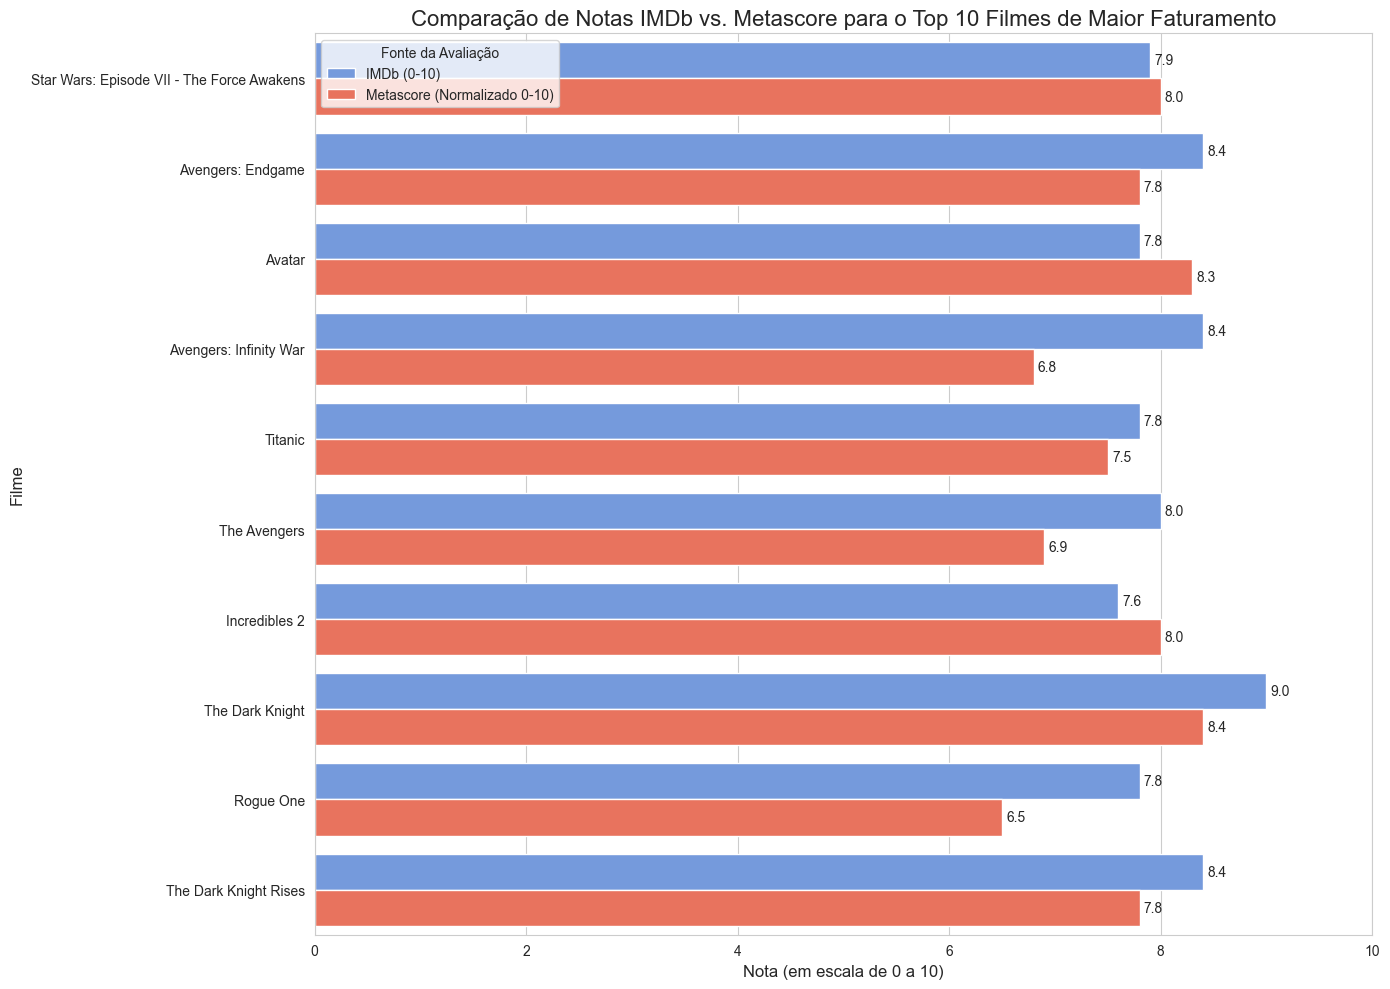

In [7]:
#Analisar a diferença entre nota_IMDB e nota_metascore dos top 10 filmes de maior faturamento

#Agrupar os top 10
df_maior_faturamento = df.sort_values(by='Faturamento', ascending=False)

top_10_filmes = df_maior_faturamento.head(10)

resultado = top_10_filmes[['Titulo', 'Faturamento', 'Nota_IMDB', 'Nota_Metascore']]

#Exibição de tabela
print("Top 10 Filmes de Maior Faturamento e suas Notas:")
print(resultado)

# Criar uma cópia para trabalhar
df_plot = top_10_filmes.copy()

# Normalizar a Nota_Metascore para a escala de 0 a 10
df_plot['Nota_Metascore_Norm'] = df_plot['Nota_Metascore'] / 10

# Selecionar as colunas que serão analizadas 
df_plot = df_plot[['Titulo', 'Nota_IMDB', 'Nota_Metascore_Norm']]

# Reestruturar o DataFrame (melt) para o formato ideal para o Seaborn
df_melted = df_plot.melt(id_vars='Titulo', var_name='Tipo_de_Nota', value_name='Nota')

# Renomear os valores para uma legenda mais clara
df_melted['Tipo_de_Nota'] = df_melted['Tipo_de_Nota'].replace({
    'Nota_IMDB': 'IMDb (0-10)',
    'Nota_Metascore_Norm': 'Metascore (Normalizado 0-10)'
})

# Gerar o Gráfico de Barras Agrupadas
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

barplot = sns.barplot(
    data=df_melted,
    x='Nota',
    y='Titulo',
    hue='Tipo_de_Nota',
    palette={'IMDb (0-10)': 'cornflowerblue', 'Metascore (Normalizado 0-10)': 'tomato'}
)

plt.title('Comparação de Notas IMDb vs. Metascore para o Top 10 Filmes de Maior Faturamento', fontsize=16)
plt.xlabel('Nota (em escala de 0 a 10)', fontsize=12)
plt.ylabel('Filme', fontsize=12)
plt.xlim(0, 10)
plt.legend(title='Fonte da Avaliação')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f', fontsize=10, padding=3)

plt.tight_layout()
plt.show() 

In [ ]:
"""
O insight principal deste gráfico é a visualização clara da frequente divergência de opinião entre o público e a crítica quando se trata de
blockbusters. Apesar de alguns titulos como 'Star Wars: Episode VII - The Force Awakens' terem notas muito proximas, na maioria dos casos a uma 
diferença notavel, sendo ue a nota IMDb, geralmente, é maior.
A PProductions pode concluir que, embora a qualidade técnica e artística (geralmente mais valorizada pela crítica) seja importante, fatores como 
entretenimento, apelo a franquias e espetáculo visual (mais valorizados pelo público) são os verdadeiros motores do sucesso financeiro.
"""

Top 10 Diretores por Média de Nota (com no mínimo 3 filmes):
                      Nota_Media_IMDB  Faturamento_Medio  Contagem_Filmes
Diretor                                                                  
Christopher Nolan            8.462500       2.421818e+08                8
Peter Jackson                8.400000       3.194625e+08                5
Francis Ford Coppola         8.400000       6.936480e+07                5
Charles Chaplin              8.333333       2.274180e+06                6
Sergio Leone                 8.266667       7.823284e+06                6
Stanley Kubrick              8.233333       3.063561e+07                9
Akira Kurosawa               8.220000       1.139155e+06               10
Frank Capra                  8.200000       6.980000e+06                4
Quentin Tarantino            8.175000       9.087929e+07                8
Rajkumar Hirani              8.175000       6.455524e+06                4


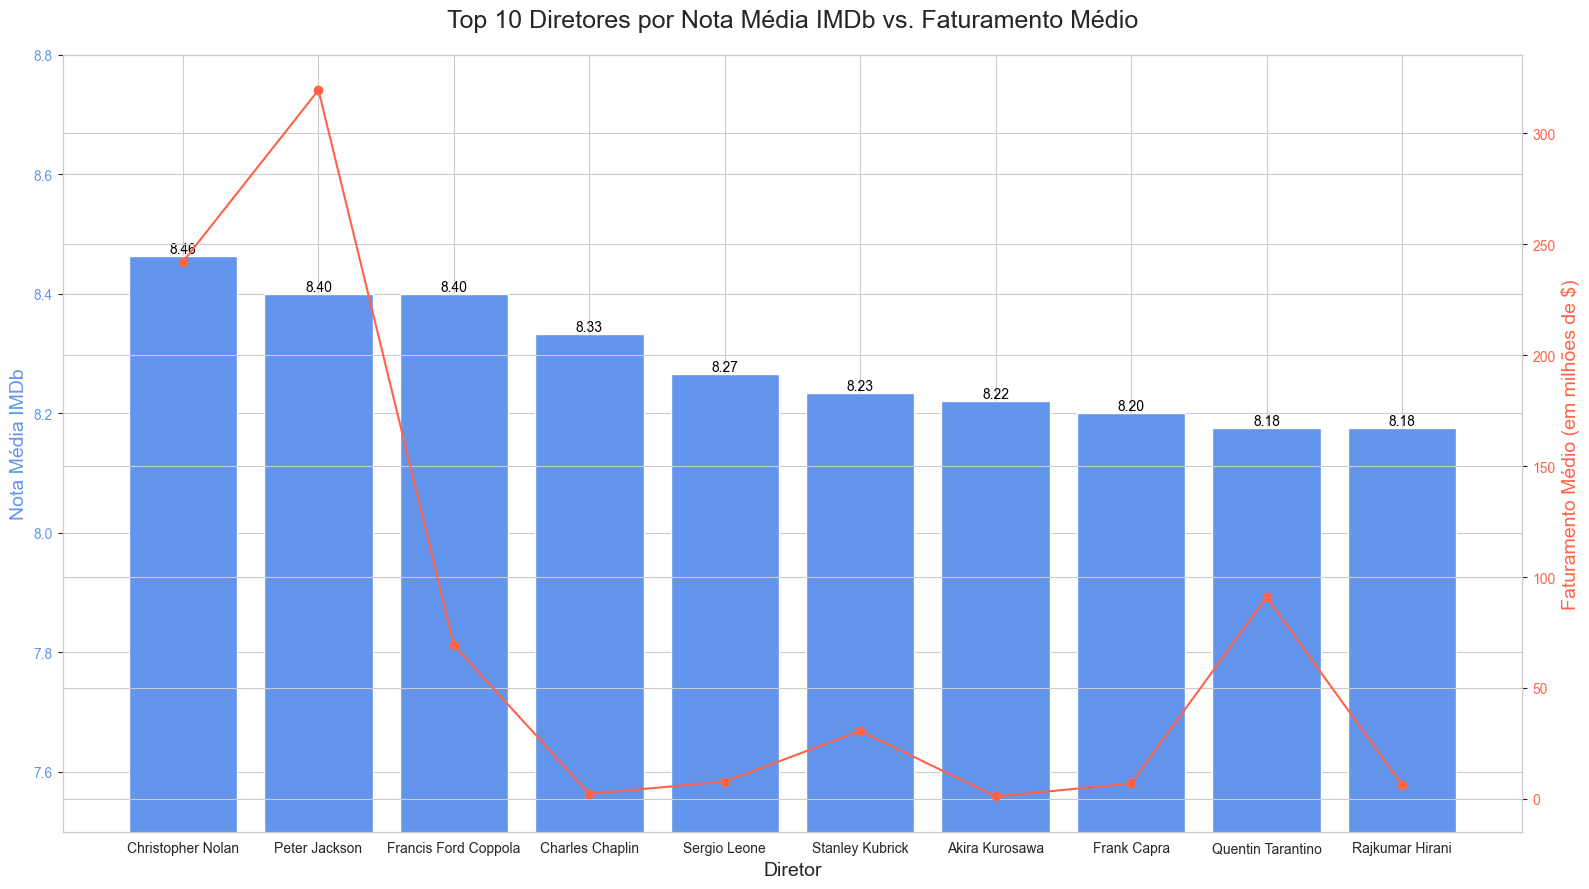

In [8]:
#Análise dos Diretores por Média de Nota

# 1. Agrupar por diretor e calcular as métricas
diretores_medias = df.groupby('Diretor').agg(
    Nota_Media_IMDB=('Nota_IMDB', 'mean'),
    Faturamento_Medio=('Faturamento', 'mean'),
    Contagem_Filmes=('Titulo', 'count')
)

# 2. Filtrar diretores com um número mínimo de filmes (ex: 3 ou mais)
# Isso evita que diretores com apenas um filme de sucesso distorçam a análise
min_filmes = 3
diretores_filtrados = diretores_medias[diretores_medias['Contagem_Filmes'] >= min_filmes]

# 3. Ordenar pela nota média e pegar o top 10
top_10_diretores_por_nota = diretores_filtrados.sort_values(by='Nota_Media_IMDB', ascending=False).head(10)

print("Top 10 Diretores por Média de Nota (com no mínimo {} filmes):".format(min_filmes))
print(top_10_diretores_por_nota)


# Preparar os dados para o gráfico
diretores = top_10_diretores_por_nota.index
nota_media = top_10_diretores_por_nota['Nota_Media_IMDB']
faturamento_medio = top_10_diretores_por_nota['Faturamento_Medio']

# Criar a figura e o primeiro eixo (para as barras de nota)
fig, ax1 = plt.subplots(figsize=(16, 9))
sns.set_style("whitegrid")

# Plotar as barras de Nota Média
color_bar = 'cornflowerblue'
ax1.set_xlabel('Diretor', fontsize=14)
ax1.set_ylabel('Nota Média IMDb', color=color_bar, fontsize=14)
bars = ax1.bar(diretores, nota_media, color=color_bar, label='Nota Média IMDb')
ax1.tick_params(axis='y', labelcolor=color_bar)
ax1.set_ylim(7.5, 8.8) # Ajustar o limite para dar mais destaque às variações da nota

# Adicionar os valores nas barras
ax1.bar_label(bars, fmt='%.2f', fontsize=10, color='black')

# Criar o segundo eixo (para a linha de faturamento)
ax2 = ax1.twinx()
color_line = 'tomato'
ax2.set_ylabel('Faturamento Médio (em milhões de $)', color=color_line, fontsize=14)
# Plotar a linha de Faturamento Médio e marcadores
ax2.plot(diretores, faturamento_medio / 1_000_000, color=color_line, marker='o', linestyle='-', label='Faturamento Médio')
ax2.tick_params(axis='y', labelcolor=color_line)

# Adicionar o título geral
plt.title('Top 10 Diretores por Nota Média IMDb vs. Faturamento Médio', fontsize=18, pad=20)

# Ajuste final
fig.tight_layout() # ajusta o layout para não cortar os rótulos

In [ ]:
"""
O principal insight aqui é que prestígio crítico e sucesso de bilheteria nem sempre andam juntos.
Por um lado, temos diretores como Christopher Nolan e Peter Jackson, que representam o "investimento ideal": eles não só possuem uma média de 
notas altíssima (barras azuis), indicando qualidade consistente, como também apresentam um faturamento médio por filme extremamente elevado
(linha vermelha), provando seu apelo comercial massivo. Por outro lado, diretores clássicos como Charles Chaplin e Akira Kurosawa, apesar de terem 
médias de nota impecáveis, mostram um faturamento médio muito baixo, refletindo uma era diferente do cinema. Isso destaca que a "qualidade" de um 
diretor não se traduz automaticamente em sucesso de bilheteria nos padrões atuais.
"""

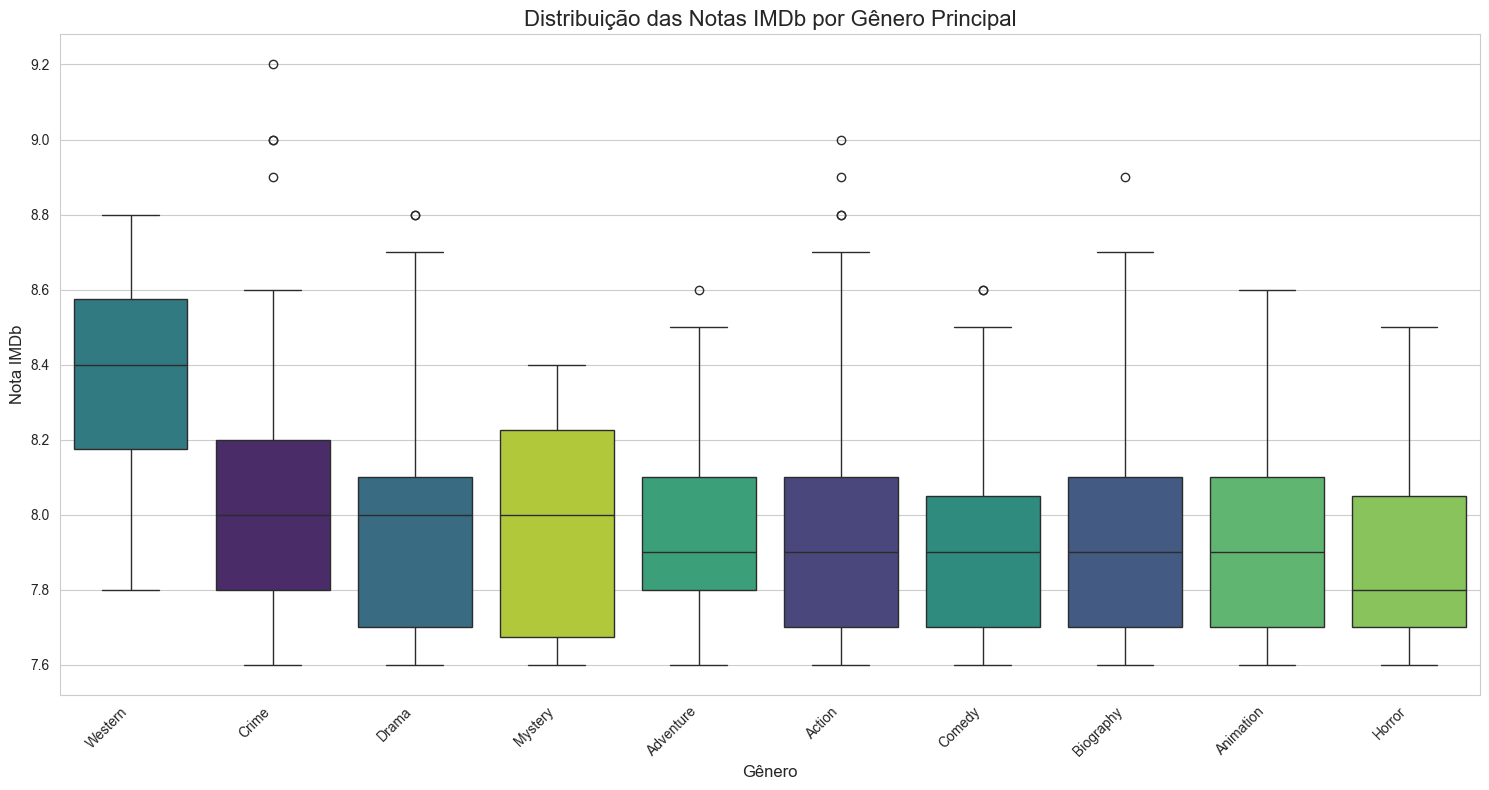

In [9]:
# Nota IMDb por Gênero Principal 

# Para uma visualização mais clara, usarei apenas o gênero principal (o primeiro da lista)
df['Genero_Principal'] = df['Genero'].apply(lambda x: x.split(',')[0])

# Vamos focar nos 10 gêneros mais comuns no dataset
top_10_generos = df['Genero_Principal'].value_counts().nlargest(10).index
df_top_generos = df[df['Genero_Principal'].isin(top_10_generos)]

# Para uma melhor visualização, vamos ordenar os gêneros pela mediana da nota IMDb
order = df_top_generos.groupby('Genero_Principal')['Nota_IMDB'].median().sort_values(ascending=False).index

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_top_generos, x='Genero_Principal', y='Nota_IMDB', order=order, palette='viridis',hue = 'Genero_Principal', legend=False)
plt.title('Distribuição das Notas IMDb por Gênero Principal', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Nota IMDb', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



In [ ]:
"""
No geral, percebe-se que não há grandes diferenças extremas entre os gêneros, mas alguns, como Western e Mystery, tendem a ser mais bem avaliados 
em média, enquanto gêneros mais populares como Horror e Comedy mostram avaliações mais voláteis e menos consistentes.
É preciso enfatizar que devido a quantidade baixa de filmes western no dataset, é possivel que sua posição acentuada no boxplot seja dierente em outro 
dataset
"""

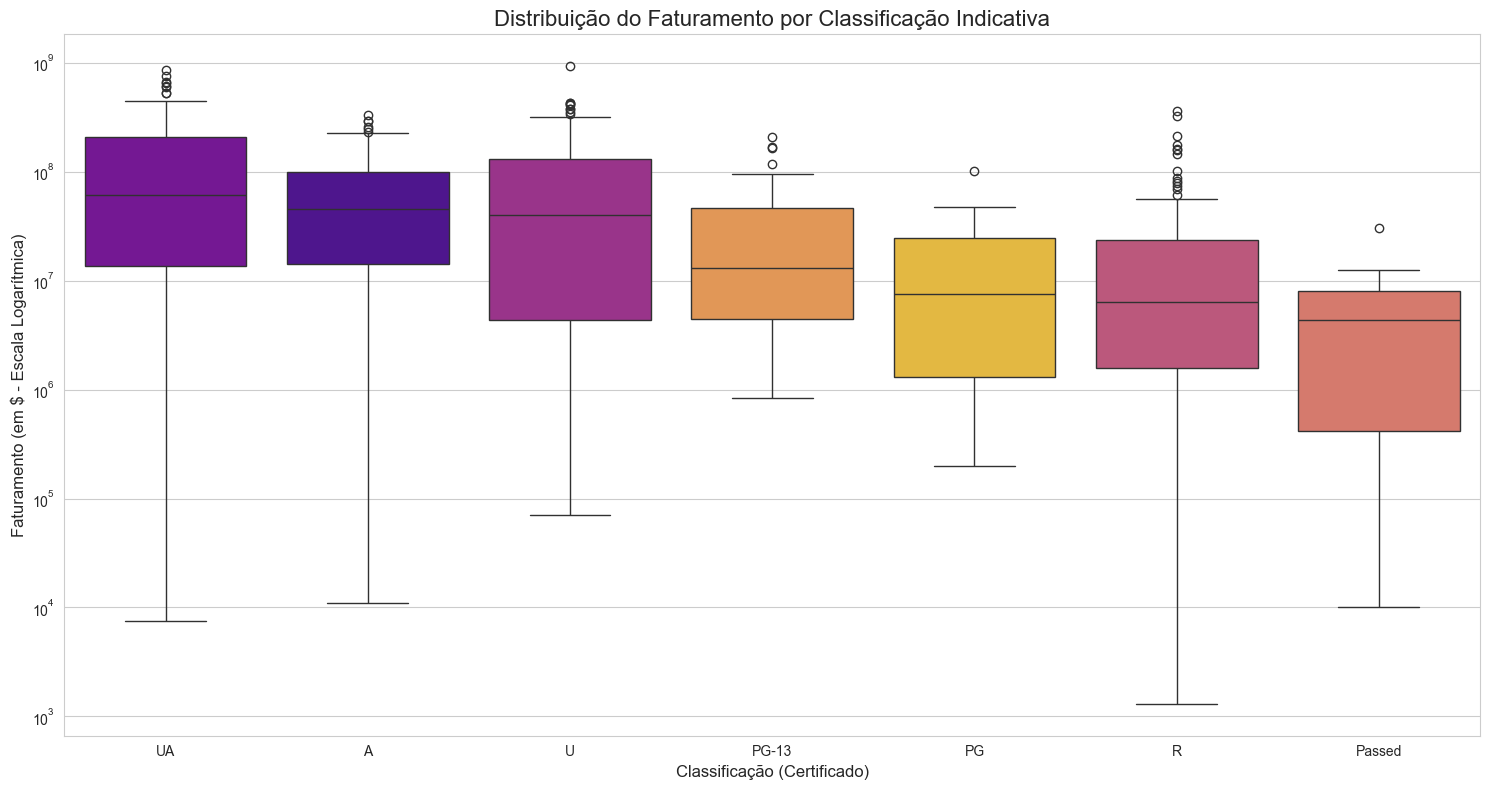

In [10]:
# Faturamento por Classificação Indicativa (Certificado) 

# Remover filmes com dados de 'Certificado' ou 'Faturamento' ausentes para esta análise
df_certificado = df.dropna(subset=['Certificado', 'Faturamento'])

# Contar quantos filmes existem por certificado para garantir relevância
certificados_comuns = df_certificado['Certificado'].value_counts()
# Manter apenas certificados com um número razoável de filmes 
certificados_filtrados = certificados_comuns[certificados_comuns > 10].index
df_certificado_filtrado = df_certificado[df_certificado['Certificado'].isin(certificados_filtrados)]

# Ordenar os certificados pela mediana do faturamento
order_cert = df_certificado_filtrado.groupby('Certificado')['Faturamento'].median().sort_values(ascending=False).index


plt.figure(figsize=(15, 8))
sns.boxplot(data=df_certificado_filtrado, x='Certificado', y='Faturamento', order=order_cert, palette='plasma', hue = 'Certificado', legend=False)

# Usar escala logarítmica no eixo Y para melhor visualização da distribuição do faturamento
plt.yscale('log')

plt.title('Distribuição do Faturamento por Classificação Indicativa', fontsize=16)
plt.xlabel('Classificação (Certificado)', fontsize=12)
plt.ylabel('Faturamento (em $ - Escala Logarítmica)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

In [ ]:
"""
O insight mais direto é que filmes com classificações mais abrangentes, como "U" (Livre) e "UA" (equivalente a +12/+13), não só possuem uma mediana
de faturamento muito superior, como também são os únicos que produzem os mega blockbusters (os pontos outliers no topo do gráfico). 
A escolha de uma classificação mais branda amplia o público potencial e, consequentemente, o teto de bilheteria.
"""